In [ ]:
n=10;

In [1]:
import numpy as np
import sympy as sy
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline


#Returns the Tridiagonal Matrix special to our problem, with 2's and -1's.
def SpecialMatrix():
    T = np.zeros((n, n))
    for i in range(0,n):
        T[[i],[i]] = 2
        if i < n-1:
            T[[i],[i+1]] = -1
            T[[i+1],[i]] = -1
        else:
            break;
    return T

#Returns a random Tridiagonal matrix, with no zeros on the three diagonals.
#Also generates it in a way that takes care of a fringe case in forward substitution that causes division by zero
def RandomTriMatrix():
    T = np.zeros((n, n))
    for i in range(0,n):
        T[[i],[i]] = int(np.random.uniform(1,9))
        if i < n-1:
            T[[i],[i+1]] = int(np.random.uniform(1,9))
            T[[i+1],[i]] = int(np.random.uniform(1,9))
        else:
            break;
    for i in range(1,n):
        if T[i][i] == (T[i][i-1]*T[i-1][i])/(T[i-1][i-1]):
            T[[i],[i]] = int(np.random.uniform(1,9))
        else:
            T[i][i] = T[i][i]    
    return T


#Returns the vector "b~" as shown in Problem 1a
def h2DiscFncVec():
    f = np.zeros(n)
    for i in range(0,n):
        f[i] += 100*(np.e)**(-10*(i+1)/(n))
    return f

#Returns the discretized form of the function "u" given to us in problem 1a, multiplied by 1/(h^2)
def h2SoluVec():
    u = np.zeros(n)
    for i in range(0,n):
        u[i] += 1-(1-((np.e)**(-10)))*((i+1)/(n))-(np.e)**((-10*(i+1))/(n))
    return u


#Turns a tridiagonal matrix into an upper-triangular matrix through row operations
#also applies these row operations to the discretized function vector "b~"
def TriForwardSub(M, f):
    for i in range(0,n-1):
        f[i+1] += -(M[i+1][i]/M[i][i])*f[i]
        M[i+1] += -((M[i+1][i])/(M[i][i]))*M[i]
#    for i in range(0,n):
#        for j in range(0,n):
#            M[i][j] = round(M[i][j],2)
    return M, f

#Faster forward substitution for the special matrix on our problem
def SpecialForwardSub(M, f):
    for i in range(0,n-1):
        x = ((i+1)/(i+2))
        f[i+1] += x*f[i]
        M[i+1] += x*M[i]
#    for i in range(0,n):
#        for j in range(0,n):
#            M[i][j] = round(M[i][j],2)
    return M, f

#Solves for and prints the solution vector "u" that solves Au = b~
def TriBackSub(M, f):
    u = np.zeros(n)
    u[n-1] = f[n-1]/M[n-1][n-1]
    for i in range(n-2,-1,-1):
        u[i] = (f[i]-(M[i][i+1])*u[i+1])/(M[i][i]);
    for i in range(0,n):
        u[i] = u[i]/(n**2)
    return u

#Faster backward substitution for the special matrix on our problem
def SpecialBackSub(M, f):
    u = np.zeros(n)
    u[n-1] = f[n-1]/M[n-1][n-1]
    for i in range(n-2,-1,-1):
        u[i] = (f[i]+u[i+1])/(M[i][i]);
    for i in range(0,n):
        u[i] = u[i]/(n**2)
    return u

In [389]:
#P = RandomMatrix()
#L_P = scipy.linalg.lu(P)[1]
#U_P = scipy.linalg.lu(P)[2]
#L_P.dot(U_P)

In [339]:
n=10;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u1 = TriBackSub(S,f)

In [340]:
u1Range = np.zeros(n)
for i in range(0,n):
    u1Range[i] = (i)/(n)

In [341]:
n=100;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u2 = TriBackSub(S,f)

In [342]:
u2Range = np.zeros(n)
for i in range(0,n):
    u2Range[i] = (i)/(n)

In [347]:
n=1000;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u3 = TriBackSub(S,f)

In [348]:
u3Range = np.zeros(n)
for i in range(0,n):
    u3Range[i] = (i)/(n)

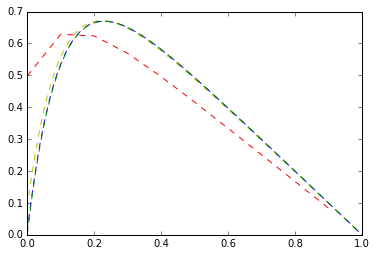

In [352]:
x = np.arange(0, 1, 0.001);
u = 1-(1-((np.e)**(-10)))*(x)-(np.e)**(-10*x)
plt.plot(u1Range, u1, 'r--')
plt.plot(u2Range, u2, 'y--')
plt.plot(u3Range, u3, 'b--')
plt.plot(x, u, 'g--')

__Part 1c__

In [ ]:
n=5;
S = SpecialMatrix()
f = h2DiscFncVec()
SpecialForwardSub(S,f)
SpecialBackSub(S,f)

In [ ]:
n=5;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)

In [20]:
n=1000;
def fnc():
    S = SpecialMatrix()
    f = h2DiscFncVec()
    TriForwardSub(S,f)
    TriBackSub(S,f)
    u = TriBackSub(S,f)
    return u

def SpecialFnc():
    S = SpecialMatrix()
    f = h2DiscFncVec()
    SpecialForwardSub(S,f)
    SpecialBackSub(S,f)
    u = SpecialBackSub(S,f)
    return u

__Part 1c: Timing__

In [23]:
S = SpecialMatrix()
f = h2DiscFncVec()

In [22]:
from timeit import default_timer as timer

start = timer()
SpecialForwardSub(S,f)
SpecialBackSub(S,f)
end = timer()
print(end - start) 

0.03554759214165415


In [24]:
start = timer()
SpecialForwardSub(S,f)
SpecialBackSub(S,f)
end = timer()
print(end - start) 

0.034887413046917004


__Part 1d: Error__

In [25]:
n=10;
def error():
    u = h2SoluVec()
    v = SpecialFnc()
    error = np.log10(np.absolute((v-u)/(u)))
    return error

_Make a table of the results for 

In [26]:
error()

array([ -1.19652444,  -1.26639983,  -1.39015982,  -1.66170301,
        -2.26102942,  -1.32834407,  -0.93375794,  -0.59200771,
        -0.17113154,  16.15406044])